# FEA Solver

Note that the rest of this solver is coded up in MATLAB, not in this Jupyter file.

We start by deriving the principle of virtual work, which is mased on Newton's 2nd Law. For a deformable body this can be written with body forces $b_i$ and surface traction forces $t_i$ as:
$$
\int_V b_i dV + \int_A t_i dA = \int_V \rho a_i dV
$$
The traction force is defined as follows:
$$
t_i = \sigma_{ji}n_j
$$
$$
\implies \int_V b_i dV + \int_A \sigma_{ji}n_j dA = \int_V \rho a_i dV
$$
Using the divergence theorem:
$$
\int_V \left(b_i+\sigma_{ji,j}-\rho a_i\right) dV = 0
$$
This must be true for any volume $V$, so:
$$
b_i + \sigma_{ji,j} - \rho a_i = 0
$$
and in the absence of acceleration:
$$
\sigma_{ji,j} + b_i = 0
$$
which is the equation for force equilibrium. The principle of virtual work is a global (integral) form of this equation. Multiplying the equation by a virtual displacement field (test function) and integrating over the body gives:
$$
-\int_V \left(\sigma_{ji,j}+\bar{b}_i\right)\delta u_i dV + \int_{A_t} \left(t_i-\bar{t}_i\right) \delta u_i dA = 0
$$
where an overbar denotes a prescribed value. Both integrands are identically zero. Considering the traction integral:
$$
\int_{A_t} t_i \delta u_i dA = \int_A t_i \delta u_i dA - \int_{A_u} t_i \delta u_i dA
$$
$$
= \int_V \left(\sigma_{ji}\delta u_i\right)_{,j} dV - \int_{A_u} t_i \delta u_i dA
$$
$$
= \int_V \sigma_{ji,j} \delta u_i dV + \int_V \sigma_{ji}\delta u_{i,j} dV - \int_{A_u} t_i \delta u_i dA
$$
Thus, substituting:
$$
\int_V \sigma_{ji}\delta u_{i,j} dV - \int_V \bar{b}_i\delta u_i dV - \int_{A_t}\bar{t}_i\delta u_idA - \int_{A_u}t_i\delta u_i dA = 0
$$
However, $\delta u_i=0$ on $A_u$ and we define the strain as $\sigma_{ij}\delta u_{i,j} = \sigma_{ij}\delta\varepsilon_{ij}$:
$$
\int_V\sigma_{ij}\delta\varepsilon_{ij}dV - \int_V\bar{b}_i\delta u_idV - \int_{A_t}\bar{t}_i\delta u_idA = 0
$$
This can also be written as $\delta W_i+\delta W_e = 0$, where $\delta W_i$ and $\delta W_e$ are the internal and external work. Including point forces $f_i$ and dropping the bars, we have
$$
\int_V\sigma_{ij}\delta\varepsilon_{ij}dV = \int_Vb_i\delta u_idV + \int_At_i\delta u_idA + \sum f_i\delta u_i
$$
For finite-element calculations, we must divide the integrals over the entire body into sums of smaller integrals over individual elements:
$$
\sum_m \int_{V^{(m)}}\delta\mathbf{\varepsilon}^T\mathbf{\sigma}dV = \sum_m \int_{V^{(m)}}\delta\mathbf{u}^T\mathbf{b}dV + \sum_m \int_{A^{(m)}}\delta\mathbf{u}^T\mathbf{t}dA + \sum \delta\mathbf{u}^T\mathbf{f}
$$

The internal work term in the principle of virtual work is as below:
$$
\delta W_i = \sum_m \int_{V^{(m)}}\delta\varepsilon^T\sigma dV
$$
If we have non-rectangular elements, though (restricting ourselves to situations with 2D plane strain), then this integral is difficult to evaluate. To alleviate this, we introduce a coordinate mapping, taking the general quadrilateral element to an origin-centred square. One way to perform this mapping is to introduce the following shape functions:
$$
N_1 = \frac{1}{4}(1-\xi)(1-\eta)
$$
$$
N_2 = \frac{1}{4}(1+\xi)(1-\eta)
$$
$$
N_3 = \frac{1}{4}(1+\xi)(1+\eta)
$$
$$
N_4 = \frac{1}{4}(1-\xi)(1+\eta)
$$
such that:

At node 1 (-1,-1): $N_1=1$, $N_2=0$, $N_3=0$, $N_4=0$

At node 2 (+1,-1): $N_1=0$, $N_2=1$, $N_3=0$, $N_4=0$

At node 3 (+1,+1): $N_1=0$, $N_2=0$, $N_3=1$, $N_4=0$

At node 4 (-1,+1): $N_1=0$, $N_2=0$, $N_3=0$, $N_4=1$

If we know the locations of the nodes in the ordinary (real) coordinates, i.e. $x_i$, $y_i$, and we have a target location $(\xi,\eta)$ in the natural coordinates, then the corresponding real coordinates are
$$
x = N_1(\xi,\eta)x_1 + N_2(\xi,\eta)x_2 + N_3(\xi,\eta)x_3 + N_4(\xi,\eta)x_4
$$
$$
y = N_1(\xi,\eta)y_1 + N_2(\xi,\eta)y_2 + N_3(\xi,\eta)y_3 + N_4(\xi,\eta)y_4
$$
This also works for the displacements:
$$
u = N_i(\xi,\eta)u_i, \quad v = N_i(\xi,\eta)v_i
$$
where $(u_i,v_i)$ are the nodal displacements. For numerical implementation, we can use matrices. We define $\mathbf{U}$ as the displacements of the corner nodes:
$$
\mathbf{U} = \left[\begin{matrix}
u_1 & v_1 & u_2 & v_2 & u_3 & v_3 & u_4 & v_4
\end{matrix}\right]^T
$$
and $\mathbf{H}$ as a matrix containing the shape functions:
$$
\mathbf{H} = \left[\begin{matrix}
N_1 & 0 & N_2 & 0 & N_3 & 0 & N_4 & 0 \\
0 & N_1 & 0 & N_2 & 0 & N_3 & 0 & N_4
\end{matrix}\right]
$$
Then, the displacement of any point inside the element is given by:
$$
\mathbf{u} = \left[\begin{matrix}
u \\ v
\end{matrix}\right] = \mathbf{H}\mathbf{U}
$$

With the displacements found, we can then move on to find the strains, which are given by:
$$
\varepsilon_{ij} = \left[\begin{matrix}
\varepsilon_{11} \\ \varepsilon_{22} \\ \varepsilon_{12}
\end{matrix}\right] = \left[\begin{matrix}
\frac{\partial u}{\partial x} \\
\frac{\partial v}{\partial y} \\
\frac{1}{2}\left(\frac{\partial u}{\partial y} + \frac{\partial v}{\partial x}\right)
\end{matrix}\right]
$$
Since we are using the isoparametric shape functions, we can start by looking at the derivatives of the displacements with respect to the natural coordinates.
$$
\frac{\partial u}{\partial\xi} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial \xi} + \frac{\partial u}{\partial y}\frac{\partial y}{\partial\xi}
$$
$$
\frac{\partial u}{\partial\eta} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial\eta} + \frac{\partial u}{\partial y}{\partial y}{\partial\eta}
$$
$$
\left[\begin{matrix}
\frac{\partial u}{\partial\xi} \\
\frac{\partial u}{\partial\eta}
\end{matrix}\right] = \left[\begin{matrix}
\frac{\partial x}{\partial\xi} & \frac{\partial y}{\partial\xi} \\
\frac{\partial x}{\partial\eta} & \frac{\partial y}{\partial\eta}
\end{matrix}\right]\left[\begin{matrix}
\frac{\partial u}{\partial x} \\
\frac{\partial u}{\partial y}
\end{matrix}\right]
$$
$$
\left[\begin{matrix}
\frac{\partial u}{\partial\xi} \\
\frac{\partial u}{\partial\eta}
\end{matrix}\right] = \left[\begin{matrix}
J_{11} & J_{12} \\
J_{21} & J_{22}
\end{matrix}\right]\left[\begin{matrix}
\frac{\partial u}{\partial x} \\
\frac{\partial u}{\partial y}
\end{matrix}\right]
$$
where we have thus defined the Jacobian matrix $\mathbf{J}$. Given that the shape function expressions for a general point in an element are:
$$
x = N_1(\xi,\eta)x_1 + N_2(\xi,\eta)x_2 + N_3(\xi,\eta)x_3 + N_4(\xi,\eta)x_4
$$
$$
y = N_1(\xi,\eta)y_1 + N_2(\xi,\eta)y_2 + N_3(\xi,\eta)y_3 + N_4(\xi,\eta)y_4
$$
the nodal coordinates are
$$
\mathbf{x} = \left[\begin{matrix}
x_1 & x_2 & x_3 & x_4 \\
y_1 & y_2 & y_3 & y_4
\end{matrix}\right]^T
$$
and the gradient of the shape functions is
$$
\nabla\mathbf{N}(\xi,\eta) = \left[\begin{matrix}
\frac{\partial N_1}{\partial\xi} & \frac{\partial N_2}{\partial\xi} & \frac{\partial N_3}{\partial\xi} & \frac{\partial N_4}{\partial\xi} \\
\frac{\partial N_1}{\partial\eta} & \frac{\partial N_2}{\partial\eta} & \frac{\partial N_3}{\partial\eta} & \frac{\partial N_4}{\partial\eta}
\end{matrix}\right]
$$
This gives the Jacobian as:
$$
\mathbf{J} = \nabla\mathbf{N}\mathbf{x}
$$
Then, the partial derivatives in the real coordinates can be written as:
$$
\left[\begin{matrix}
\frac{\partial u}{\partial x} \\
\frac{\partial u}{\partial y}
\end{matrix}\right] = \mathbf{J}^{-1}\left[\begin{matrix}
\frac{\partial u}{\partial\xi} \\
\frac{\partial u}{\partial\eta}
\end{matrix}\right] = \mathbf{J}^{-1}\nabla\mathbf{N}\left[\begin{matrix}
u_1 & u_2 & u_3 & u_4
\end{matrix}\right]^T
$$
$$
\left[\begin{matrix}
\frac{\partial v}{\partial x} \\
\frac{\partial v}{\partial y}
\end{matrix}\right] = \mathbf{J}^{-1}\left[\begin{matrix}
\frac{\partial v}{\partial\xi} \\
\frac{\partial v}{\partial\eta}
\end{matrix}\right] = \mathbf{J}^{-1}\nabla\mathbf{N}\left[\begin{matrix}
v_1 & v_2 & v_3 & v_4
\end{matrix}\right]^T
$$
Defining $\mathbf{M} = \mathbf{J}^{-1}\nabla\mathbf{N}$, we then have:
$$
\left[\begin{matrix}
\varepsilon_{11} \\
\varepsilon_{22} \\
\varepsilon_{12}
\end{matrix}\right] = \left[\begin{matrix}
M_{11} & 0 & M_{12} & 0 & M_{13} & 0 & M_{14} & 0 \\
0 & M_{21} & 0 & M_{22} & 0 & M_{23} & 0 & M_{24} \\
M_{11} & M_{21} & M_{12} & M_{22} & M_{13} & M_{23} & M_{14} & M_{24}
\end{matrix}\right]\left[\begin{matrix}
u_1 \\ v_1 \\ u_2 \\ v_2 \\ u_3 \\ v_3 \\ u_4 \\ v_4
\end{matrix}\right]
$$
$$
\varepsilon^{(m)} = \mathbf{B}^{(m)}\mathbf{U}^{(m)}
$$
Thus, we can calculate the strain using only knowledge of the shape functions and the nodal displacements.

With the strain found, Hooke's law then gives the stress in each element as:
$$
\sigma^{(m)} = \mathbf{C}^{(m)}\varepsilon^{(m)} = \mathbf{C}^{(m)}\mathbf{B}^{(m)}\mathbf{U}^{(m)}
$$
where the element stiffness matrix is given by:
$$
\mathbf{C}^{(m)} = \frac{E}{(1+\nu)(1-2\nu)}\left[\begin{matrix}
1-\nu & \nu & 0 \\
\nu & 1-\nu & 0 \\
0 & 0 & \frac{1}{2}-\nu
\end{matrix}\right]
$$
The first term in the principle of virtual work can be written as:
$$
\sum_m \int_{V^{(m)}} \delta\varepsilon^T\sigma dV
$$
which is taken over each irregular element $m$. To simplify the integration, we use the shape functions to change to natural coordinates as:
$$
\int_A f(x,y) dxdy = \int_A f(\xi,\eta)J dxdy
$$
where $J = \det{(\nabla\mathbf{N}\mathbf{x})}$. Further, we will use Gaussian quadrature as in the following 1D example:
$$
\int_{-1}^1 f(x) dx \approx \sum_{i=1}^n w_i f(x_i)
$$

|$n$ |$x_i$                          |$w_i$      |
|:--:|:-----------------------------:|:---------:|
|1   |$x_1=0$                        |$w_1=2$    |
|2   |$x_{1,2}=\pm\frac{1}{\sqrt{3}}$|$w_{1,2}=1$|

Thus, we know that $\delta\varepsilon=\mathbf{B}\delta\mathbf{U}$ so:
$$
\delta\varepsilon^T = \delta\mathbf{U}^T\mathbf{B}^T
$$
Therefore:
$$
\delta\mathbf{U}^T\left[\int_V\mathbf{B}^T\mathbf{C}\mathbf{B}dV\right]\mathbf{U} = \delta\mathbf{U}^T\mathbf{k}^{(m)}\mathbf{U} = \delta\mathbf{U}^T\left[\sum_p^{np}\mathbf{B}^T\mathbf{C}\mathbf{B}Jw_p\right]\mathbf{U}
$$

Hence, the principle of virtual work is:
$$
\int_{V^{(m)}}\delta\varepsilon^T\sigma dV = \int_{V^{(m)}}\delta\mathbf{u}^T\mathbf{b}dV + \int_{A^{(m)}}\delta\mathbf{u}^T\mathbf{t}dA + \delta\mathbf{u}^T\mathbf{f}
$$
Further, $\mathbf{u}=\mathbf{H}\mathbf{U}$, giving $\delta\mathbf{u}^T=\delta\mathbf{U}^T\mathbf{H}^T$.
$$
\delta\mathbf{U}^T\left[\sum_p^{np}\mathbf{B}^T\mathbf{C}\mathbf{B}Jw_p\right]\mathbf{U} = \delta\mathbf{U}^T\left[\sum_p^{np}\mathbf{H}^T\mathbf{b}Jw_p\right] + \delta\mathbf{U}^T\left[\sum_p^{np}\mathbf{H}^T\mathbf{t}Jw_p\right] + \delta\mathbf{U}^T\mathbf{f}
$$
$\delta\mathbf{U}^T$ cancels out of this equation, so we then get
$$
\left[\sum_p^{np}\mathbf{B}^T\mathbf{C}\mathbf{B}Jw_p\right]\mathbf{U} = \sum_p^{np}\mathbf{H}^T\mathbf{b}Jw_p + \sum_p^{np}\mathbf{H}^T\mathbf{t}Jw_p + \mathbf{f}
$$
This can be written in a familiar form as
$$
\mathbf{R} = \mathbf{K}\mathbf{U}
$$
which allows us to solve for the displacements $\mathbf{U}$. 

The full non-simplified FEA solver allowing an arbitrary input file is as below:

In [2]:
import sys
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Define name of input file here
inpFile = "/Users/jonny/OneDrive/Documents/Miscellaneous/Dogbone_Tension.txt"

In [7]:
# Input file syntax:
# *Node
# 1, 0.0, 0.0
# 2, 0.0, 1.0
# 3, 1.0, 1.0
# 4, 1.0, 0.0
# *Element
# 1, 1, 2, 3, 4
# *Step
# *Boundary
# 1, 1, 2, 0.0    # nodeId, dof1, dof2, value
# 2, 1, 1, 0.0
# 3, 1, 1, 0.01
# 4, 1, 1, 0.01
# 4, 2, 2, 0.0
def shape(xi):
    """
    Shape functions for a 4-node, isoparametric 2D plane strain element
    N_i(xi, eta), where i=[1, 2, 3, 4]
    Input: 1x2, Output: 1x4
    """
    xi, eta = tuple(xi)
    N = [(1-xi)*(1-eta), (1+xi)*(1-eta), (1+xi)*(1+eta), (1-xi)*(1+eta)]
    return 0.25 * np.array(N)


def gradshape(xi):
    """
    Gradient of shape functions for a 4-node, isoparametric element
    dN_i(xi, eta)/dxi and dN_i(xi, eta)/deta
    Input: 1x2, Output 2x4
    """
    xi, eta = tuple(xi)
    dN = [[-(1-eta), (1-eta), (1+eta), -(1+eta)],
          [-(1-xi), -(1+xi), (1+xi), (1-xi)]]
    return 0.25 * np.array(dN)


def local_error(str):
    print("*** ERROR ***")
    print(str)
    sys.exit(3)


def read_inp_file(inpFileName, nodes, conn, boundary):
    print("\n** Read input file")
    inpFile = open(inpFileName, "r")
    lines = inpFile.readlines()
    inpFile.close()
    state = 0
    for line in lines:
        line = line.strip()
        if len(line) <= 0: continue
        if line[0] == "*":
            state = 0
        if line.lower() == "*node":
            state = 1
            continue
        if line.lower() == "*element":
            state = 2
            continue
        if line.lower() == "*boundary":
            state = 3
            continue
        if state == 0:
            continue
        if state == 1:
            # Read nodes
            values = line.split(",")
            if len(values) != 3:
                local_error("A node definition needs 3 values")
            nodeNr = int(values[0]) - 1  # Zero indexing in Python
            xx = float(values[1])
            yy = float(values[2])
            nodes.append([xx, yy])  # Assume the nodes are ordered 1, 2, 3, ...
            continue
        if state == 2:
            # Read elements
            values = line.split(",")
            if len(values) != 5:
                local_error("An element definition needs 5 values")
            elemNr = int(values[0])
            n1 = int(values[1]) - 1  # Zero indexing
            n2 = int(values[2]) - 1
            n3 = int(values[3]) - 1
            n4 = int(values[4]) - 1
            # conn.append([n1, n2, n3, n4])  # Assume elements ordered 1, 2, 3, ...
            conn.append([n1, n4, n3, n2])  # Assume elements ordered 1, 2, 3, ...
            continue
        if state == 3:
            # Read displacement boundary conditions
            values = line.split(",")
            if len(values) != 4:
                local_error("A displacement boundary condition needs 4 values")
            nodeNr = int(values[0]) - 1  # Zero indexing
            dof1 = int(values[1])
            dof2 = int(values[2])
            val = float(values[3])
            if dof1 == 1:
                boundary.append([nodeNr, 1, val])
            if dof2 == 2:
                boundary.append([nodeNr, 2, val])
            continue

In [10]:
def main():
    #
    # Main program
    #
    nodes = []
    conn = []
    boundary = []
    print("Input file: ", inpFile)
    read_inp_file(inpFile, nodes, conn, boundary)
    nodes = np.array(nodes)
    num_nodes = len(nodes)
    print("    Number of nodes: ", len(nodes))
    print("    Number of elements: ", len(conn))
    print("    Number of displacement boundary conditions: ", len(boundary))

    ##################################

    # Plane-strain material tangent (Bathe, p.194)
    E = 100.0
    v = 0.3
    C = (E/((1+v)*(1-(2*v)))) * np.array([[1-v, v, 0], [v, 1-v, 0], [0, 0, 0.5-v]])
    ##################################
    # Make stiffness matrix
    # If N is the number of DOFs, then K is NxN
    K = np.zeros((2*num_nodes, 2*num_nodes))  # Square zero matrix
    # 2x2 Gaussian quadrature with 4 Gauss points
    # q4 is 2x2
    q4 = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]]) / np.sqrt(3.0)
    print("\n** Assemble stiffness matrix")
    # Strain in an element is: ε   = B   x U
    #                          3x1   3x8   8x1
    #
    # ε11 = B11 U1 + B12 U2 + B13 U3 + B14 U4 + B15 U5 + B16 U6 + B17 U7 + B18 U8
    #     = B11 u1          + B13 u1          + B15 u1          + B17 u1
    #     = dN1/dx u1       + dN2/dx u1       + dN3/dx u1       + dN4/dx u1
    B = np.zeros((3,8))
    # conn[0] is the node numbers of each element
    for c in conn:  # Loop through each element
        # Coordinates of each node in the element
        # Shape = 4x2
        # e.g.:
        #     nodePts = [[0.0, 0.0],
        #                [0.033, 0.0],
        #                [0.033, 0.066],
        #                [0.0, 0.066]],
        nodePts = nodes[c,:]
        Ke = np.zeros((8, 8))  # Element stiffness matrix is 8x8
        for q in q4:  # For each Gauss point
            # q is 1x2, N(xi, eta)
            dN = gradshape(q)  # Partial derivative of N with respect to (xi, eta) is 2x4
            J = np.dot(dN, nodePts).T  # J is 2x2
            dN = np.dot(np.linalg.inv(J), dN)  # Partial derivative of N wrt (x, y) is 2x4
            # Assemble B matrix
            B[0,0::2] = dN[0,:]
            B[1,1::2] = dN[1,:]
            B[2,0::2] = dN[1,:]
            B[2,1::2] = dN[0,:]
            # Element stiffness matrix
            Ke += np.dot(np.dot(B.T, C), B) * np.linalg.det(J)
        # Scatter operation
        for i, I in enumerate(c):
            for j, J in enumerate(c):
                K[2*I, 2*J] += Ke[2*i, 2*j]
                K[(2*I)+1, 2*J] += Ke[(2*i)+1, 2*j]
                K[(2*I)+1, (2*J)+1] += Ke[(2*i)+1, (2*j)+1]
                K[2*I, (2*J)+1] += Ke[2*i, (2*j)+1]
    ##################################
    # Assign nodal forces and boundary conditions
    # If N is the number of nodes, then f is 2xN
    f = np.zeros((2*num_nodes))  # Initialize to 0 forces
    # Displacement boundary conditions are written as follows:
    # [k11 k12 k13] [u1]   [f1]
    # [k21 k22 k23] [u2] = [f2]
    # [k31 k32 k33] [u3]   [f3]
    #
    # If u3 = x then:
    # [k11 k12 k13] [u1]   [f1]
    # [k21 k22 k23] [u2] = [f2]
    # [k31 k32 k33] [x ]   [f3]
    # =>
    # [k11 k12 k13] [u1]   [f1]
    # [k21 k22 k23] [u2] = [f2]
    # [  0   0   1] [u3]   [x ]
    # And the reaction force is
    # f3 = [k31 k32 k33] * [u1 u2 u3]^T
    for i in range(len(boundary)):
        nn = boundary[i][0]
        dof = boundary[i][1]
        val = boundary[i][2]
        j = 2 * nn
        if dof == 2: j = j + 1
        K[j,:] = 0.0
        K[j, j] = 1.0
        f[j] = val
    #################################
    print("\n** Solve linear system: Ku = f")  # [K] = 2Nx2N, [f] = 2Nx1, [u] = 2Nx1
    u = np.linalg.solve(K, f)
    #################################
    print("\n** Post-process the data")
    # Pre-allocate space for nodal stress and strain
    node_strain = []
    node_stress = []
    for ni in range(len(nodes)):
        node_strain.append([0.0, 0.0, 0.0])
        node_stress.append([0.0, 0.0, 0.0])
    node_strain = np.array(node_strain)
    node_stress = np.array(node_stress)

    print(f"Min. displacements: u1 = {min(u[0::2]):.4g}, u2 = {min(u[1::2]):.4g}")
    print(f"Max. displacements: u1 = {max(u[0::2]):.4g}, u2 = {max(u[1::2]):.4g}")
    emin = np.array([9.0e9, 9.0e9, 9.0e9])
    emax = np.array([-9.0e9, -9.0e9, -9.0e9])
    smin = np.array([9.0e9, 9.0e9, 9.0e9])
    smax = np.array([-9.0e9, -9.0e9, -9.0e9])
    for c in conn:  # For each element (conn is Nx4)
        nodePts = nodes[c,:]  # 4x2
        for q in q4:  # For each integration point
            dN = gradshape(q)                  # 2x4
            J = np.dot(dN, nodePts).T          # 2x2
            dN = np.dot(np.linalg.inv(J), dN)  # 2x4
            B[0,0::2] = dN[0,:]                # 3x8
            B[1,1::2] = dN[1,:]
            B[2,0::2] = dN[1,:]
            B[2,1::2] = dN[0,:]

            UU = np.zeros((8, 1))  # 8x1
            UU[0] = u[2*c[0]]
            UU[1] = u[(2*c[0])+1]
            UU[2] = u[2*c[1]]
            UU[3] = u[(2*c[1])+1]
            UU[4] = u[2*c[2]]
            UU[5] = u[(2*c[2])+1]
            UU[6] = u[2*c[3]]
            UU[7] = u[(2*c[3])+1]
            # Get the strain and stress at the integration point
            strain = B @ UU
            stress = C @ strain
            emin[0] = min(emin[0], strain[0][0])
            emin[1] = min(emin[1], strain[1][0])
            emin[2] = min(emin[2], strain[2][0])
            emax[0] = max(emax[0], strain[0][0])
            emax[1] = max(emax[1], strain[1][0])
            emax[2] = max(emax[2], strain[2][0])

            node_strain[c[0]][:] = strain.T[0]
            node_strain[c[1]][:] = strain.T[0]
            node_strain[c[2]][:] = strain.T[0]
            node_strain[c[3]][:] = strain.T[0]
            node_stress[c[0]][:] = stress.T[0]
            node_stress[c[1]][:] = stress.T[0]
            node_stress[c[2]][:] = stress.T[0]
            node_stress[c[3]][:] = stress.T[0]
            smax[0] = max(smax[0], stress[0][0])
            smax[1] = max(smax[1], stress[1][0])
            smax[2] = max(smax[2], stress[2][0])
            smin[0] = min(smin[0], stress[0][0])
            smin[1] = min(smin[1], stress[1][0])
            smin[2] = min(smin[2], stress[2][0])
    print(f"Min strains: e11 = {emin[0]:.4g}, e22 = {emin[1]:.4g}, e12 = {emin[2]:.4g}")
    print(f"Max strains: e11 = {emax[0]:.4g}, e22 = {emax[1]:.4g}, e12 = {emax[2]:.4g}")
    print(f"Min stress: s11 = {smin[0]:.4g}, s22 = {smin[1]:.4g}, s12 = {smin[2]:.4g}")
    print(f"Max stress: s11 = {smax[0]:.4g}, s22 = {smax[1]:.4g}, s12 = {smax[2]:.4g}")
    #################################
    print("\n** Plot displacement")
    xvec = []
    yvec = []
    res = []
    plot_type = "e11"
    for ni, pt in enumerate(nodes):
        xvec.append(pt[0]+u[2*ni])
        yvec.append(pt[1]+u[(2*ni)+1])
        if plot_type == "u1": res.append(u[2*ni])              # x-disp
        if plot_type == "u2": res.append(u[(2*ni)+1])          # y-disp
        if plot_type == "s11": res.append(node_stress[ni][0])  # s11
        if plot_type == "s22": res.append(node_stress[ni][1])  # s22
        if plot_type == "s12": res.append(node_stress[ni][2])  # s12
        if plot_type == "e11": res.append(node_strain[ni][0])  # e11
        if plot_type == "e22": res.append(node_strain[ni][1])  # e22
        if plot_type == "e12": res.append(node_strain[ni][2])  # e12
    tri = []
    for c in conn:
        tri.append([c[0], c[1], c[2]])
        tri.append([c[0], c[2], c[3]])
    t = plt.tricontourf(xvec, yvec, res, triangles=tri, levels=14, cmap=plt.cm.jet)
    # plt.scatter(xvec, yvec, marker="o", c="b", s=0.5)  # Plot the nodes
    plt.grid()
    plt.colorbar(t)
    plt.title(plot_type)
    plt.axis("equal")
    plt.show()
    print("Done!")


main()



Input file:  /Users/jonny/OneDrive/Documents/Miscellaneous/Dogbone_Tension.txt

** Read input file
    Number of nodes:  0
    Number of elements:  0
    Number of displacement boundary conditions:  0

** Assemble stiffness matrix

** Solve linear system: Ku = f

** Post-process the data


ValueError: min() arg is an empty sequence

The simplified FEA solver with hard-coded geometry, forces and boundary conditions is:

Create mesh
Material model - plane strain
Create global stiffness matrix
Assign nodal forces and boundary conditions
Solving linear system
Max. displacement =  6.745400245718034
Plotting displacement


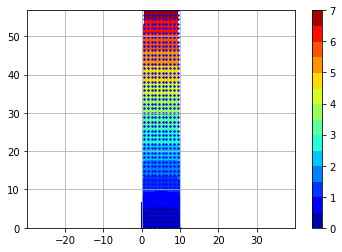

In [12]:
import numpy as np
import math
from matplotlib import pyplot as plt
def shape(xi):
    x, y = tuple(xi)
    N = [(1.0-x)*(1.0-y), (1.0+x)*(1.0-y), (1.0+x)*(1.0+y), (1.0-x)*(1.0+y)]
    return 0.25*np.array(N)
def gradshape(xi):
    x, y = tuple(xi)
    dN = [[-(1.0-y),  (1.0-y), (1.0+y), -(1.0+y)],
          [-(1.0-x), -(1.0+x), (1.0+x),  (1.0-x)]]
    return 0.25 * np.array(dN)
###############################
print('Create mesh')
# Input
mesh_ex = 9
mesh_ey = 49
mesh_lx = 10.0
mesh_ly = 50.0
# Derived quantities
mesh_nx      = mesh_ex + 1
mesh_ny      = mesh_ey + 1
num_nodes    = mesh_nx * mesh_ny
num_elements = mesh_ex * mesh_ey
mesh_hx      = mesh_lx / mesh_ex
mesh_hy      = mesh_ly / mesh_ey
nodes = []
for y in np.linspace(0.0, mesh_ly, mesh_ny):
    for x in np.linspace(0.0, mesh_lx, mesh_nx):
        nodes.append([x, y])
nodes = np.array(nodes)
conn = []
for j in range(mesh_ey):
    for i in range(mesh_ex):
        n0 = i + (j*mesh_nx)
        conn.append([n0, n0+1, n0+1+mesh_nx, n0+mesh_nx])
###############################
print ('Material model - plane strain')
E = 100.0
v = 0.48
C = (E/((1.0+v)*(1.0-(2.0*v)))) * np.array([[1.0-v,     v,     0.0],
                                            [    v, 1.0-v,     0.0],
                                            [  0.0,   0.0,   0.5-v]])
###############################
print('Create global stiffness matrix')
K = np.zeros((2*num_nodes, 2*num_nodes))
q4 = [[x/np.sqrt(3.0), y/np.sqrt(3.0)] for y in [-1.0, 1.0] for x in [-1.0, 1.0]]
B = np.zeros((3, 8))
for c in conn:
    xIe = nodes[c,:]
    Ke = np.zeros((8, 8))
    for q in q4:
        dN = gradshape(q)
        J  = np.dot(dN, xIe).T
        dN = np.dot(np.linalg.inv(J), dN)
        B[0,0::2] = dN[0,:]
        B[1,1::2] = dN[1,:]
        B[2,0::2] = dN[1,:]
        B[2,1::2] = dN[0,:]
        Ke += np.dot(np.dot(B.T, C), B) * np.linalg.det(J)
    for i, I in enumerate(c):
        for j, J in enumerate(c):
            K[2*I, 2*J]     += Ke[2*i, 2*j]
            K[2*I+1, 2*J]   += Ke[2*i+1, 2*j]
            K[2*I+1, 2*J+1] += Ke[2*i+1, 2*j+1]
            K[2*I, 2*J+1]   += Ke[2*i, 2*j+1]
###############################
print('Assign nodal forces and boundary conditions')
f = np.zeros((2*num_nodes))
for i in range(num_nodes):
    if nodes[i, 1] == 0.0:
        K[2*i,:]            = 0.0
        K[(2*i)+1,:]        = 0.0
        K[2*i, 2*i]         = 1.0
        K[(2*i)+1, (2*i)+1] = 1.0
    if nodes[i, 1] == mesh_ly:
        x = nodes[i, 0]
        f[(2*i)+1] = 20.0
        if x == 0.0 or x == mesh_lx:
            f[(2*i)+1] *= 0.5
###############################
print('Solving linear system')
u = np.linalg.solve(K, f)
print('Max. displacement = ', max(u))
###############################
print('Plotting displacement')
ux = np.reshape(u[0::2], (mesh_ny,mesh_nx))
uy = np.reshape(u[1::2], (mesh_ny,mesh_nx))
xvec = []
yvec = []
res  = []
for i in range(mesh_nx):
    for j in range(mesh_ny):
        xvec.append((i*mesh_hx)+ux[j, i])
        yvec.append((j*mesh_hy)+uy[j, i])
        res.append(uy[j, i])
t = plt.tricontourf(xvec, yvec, res, levels=14, cmap=plt.cm.jet)
plt.scatter(xvec, yvec, marker='o', c='b', s=2)
plt.grid()
plt.colorbar(t)
plt.axis('equal')
plt.show()